# Task 3: Helper notebook for loading the data and saving the predictions

In [1]:
import pickle
import gzip
import numpy as np
import os

### Helper functions

In [2]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [3]:
def save_zipped_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, 2)

### Load data, make predictions and save prediction in correct format

In [5]:
# load data
train_data = load_zipped_pickle("data/train.pkl")
test_data = load_zipped_pickle("data/test.pkl")
# samples = load_zipped_pickle("data/sample.pkl")

In [6]:
from tqdm import tqdm
import matplotlib.pyplot as plt

def preprocess_train_data(data):
    ''' Preprocess training data for video segmentation task.
    Returns:
        names: list of video names
        video_frames: list of video frames as numpy arrays
        mask_frames: list of corresponding mask frames as numpy arrays
    '''
    
    video_frames = []
    mask_frames = []
    names = []
    dataset_type = []
    for item in tqdm(data):
        video = item['video']
        name = item['name']
        height, width, n_frames = video.shape
        mask = np.zeros((height, width, n_frames), dtype=np.bool)
        for frame in item['frames']:
            mask[:, :, frame] = item['label'][:, :, frame]
            video_frame = video[:, :, frame]
            mask_frame = mask[:, :, frame]
            video_frame = np.expand_dims(video_frame, axis=2).astype(np.float32)
            mask_frame = np.expand_dims(mask_frame, axis=2).astype(np.int32)
            video_frames.append(video_frame)
            mask_frames.append(mask_frame)
            names.append(name)
            dataset_type.append(item['dataset'])
    return names, video_frames, mask_frames, dataset_type

def preprocess_test_data(data):
    video_frames = []
    names = []
    for item in tqdm(data):
        video = item['video']
        video = video.astype(np.float32).transpose((2, 0, 1))
        video = np.expand_dims(video, axis=3)
        video_frames += list(video)
        names += [item['name'] for _ in video]
    return names, video_frames

In [ ]:
names, videos, masks, dataset_types = preprocess_train_data(train_data)
test_names, test_videos = preprocess_test_data(test_data)

100%|██████████| 65/65 [00:01<00:00, 55.62it/s] 


ValueError: too many values to unpack (expected 3)

195
1507


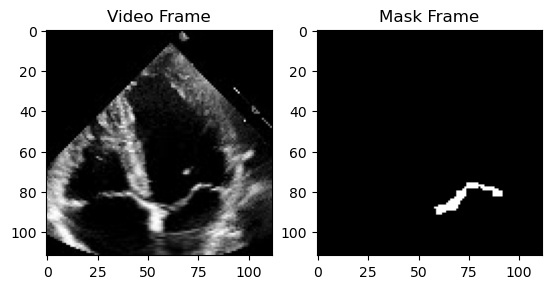

In [15]:
assert len(names) == len(videos) == len(masks)
assert len(test_names) == len(test_videos)

print(len(names))
print(len(test_names))

# print image of first video first frame on left and mask on right
plt.subplot(1, 2, 1)
plt.imshow(videos[0][:, :, 0], cmap='gray')
plt.title('Video Frame')
plt.subplot(1, 2, 2)
plt.imshow(masks[0][:, :, 0], cmap='gray')
plt.title('Mask Frame')
plt.show()

### From the flattented array, retrieve indices and length for submission format

In [ ]:
def get_sequences(arr):
    first_indices, last_indices, lengths = [], [], []
    n, i = len(arr), 0
    arr = [0] + list(arr) + [0]
    for index, value in enumerate(arr[:-1]):
        if arr[index+1]-arr[index] == 1:
            first_indices.append(index)
        if arr[index+1]-arr[index] == -1:
            last_indices.append(index)
    lengths = list(np.array(last_indices)-np.array(first_indices))
    return first_indices, lengths

### Create .csv in submission format

In [ ]:
import pandas as pd

df = pd.DataFrame({"id":ids, "value":[list(map(int, minili)) for minili in values]})
df.to_csv(f"mysubmissionfile_{THRESHOLD}.csv", index=False)